# Restaurant Reviews

<b>dataset : </b> https://www.kaggle.com/datasets/vigneshwarsofficial/reviews

## Importing the libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data exploration
<b>Load the data

In [3]:
dataset = pd.read_csv("Restaurant_Reviews.tsv", delimiter="\t" , quoting=3)

<b>Print first 5 rows from my dataset

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<b>Print the last 5 rows from my dataset

In [5]:
dataset.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


## Data Exploration

<b>Print the number of rows and columns

In [6]:
dataset.shape

(1000, 2)

<b>Print the information ( type of each column and the value of non-null of each one)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [9]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Dealing with missing values

In [11]:
dataset.isnull().values.any()

False

## Countplot

<AxesSubplot:xlabel='Liked', ylabel='count'>

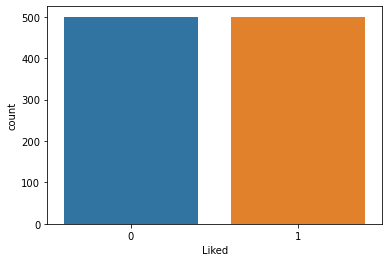

In [12]:
sns.countplot(dataset["Liked"])

In [17]:
#postive reviews
(dataset.Liked == 1).sum()

500

In [18]:
#negative reviews
(dataset.Liked == 0).sum()

500

## Length of the messages

In [19]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [20]:
dataset["Length"] = dataset["Review"].apply(len)

In [21]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<AxesSubplot:ylabel='Frequency'>

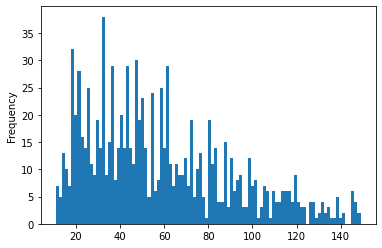

In [23]:
# Histogram
dataset["Length"].plot(bins=100 , kind="hist")

In [25]:
dataset.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [26]:
# Longest message

dataset[dataset["Length"] ==149]["Review"].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [27]:
# shortest message

dataset[dataset["Length"] ==11]["Review"].iloc[0]

'DELICIOUS!!'

In [28]:
positive = dataset[dataset["Liked"] ==1]

In [30]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [29]:
negative = dataset[dataset["Liked"] ==0]

In [31]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


## Cleaning the Text

In [32]:
import re 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [41]:
corpus = []

for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #single row for loop
    review =' '.join(review)
    corpus.append(review)

In [42]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words Model

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer(max_features=1500)

In [46]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [49]:
# reducing the number of features

# creating the count vectorizer model with max_features
cv = CountVectorizer(max_features = 1200)

# feeding the corpus data to the count vectorizer model
x = cv.fit_transform(corpus).toarray()

# checking the shape
print(x.shape)

# maing the dependent variable column
y = dataset.iloc[:, 1].values
print(y.shape)

(1000, 1200)
(1000,)


In [50]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 1200)
(750,)
(250, 1200)
(250,)


In [51]:
# min max scaling

from sklearn.preprocessing import MinMaxScaler

# creating a min max scaler
mm = MinMaxScaler()

# feeding the independent variables into the model
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [52]:
# Naive Bayes Theorem

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# creating the model
model = GaussianNB()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8893333333333333
Testing Accuracy : 0.712
[[ 67  50]
 [ 22 111]]


In [53]:
# applying random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = RandomForestClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9946666666666667
Testing Accuracy : 0.732
[[94 23]
 [44 89]]


In [54]:
# applying decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = DecisionTreeClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9946666666666667
Testing Accuracy : 0.704
[[78 39]
 [35 98]]


In [55]:
# applying logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# creating the model
model = LogisticRegression()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9573333333333334
Testing Accuracy : 0.776
[[98 19]
 [37 96]]


In [56]:
# applying svm

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# creating the model
model = SVC()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9746666666666667
Testing Accuracy : 0.74
[[102  15]
 [ 50  83]]


In [57]:
# applying MLP

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = MLPClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9906666666666667
Testing Accuracy : 0.748
[[89 28]
 [35 98]]
